In [5]:
from sympy.physics.quantum import TensorProduct,Dagger
from sympy import Symbol
from sympy import sin, cos, exp, sqrt, pi
from sympy.matrices import Matrix

theta = Symbol('theta')
phi = Symbol('phi')
p = Symbol('p')

def general_state_matrix():
    return Matrix([[cos(theta/2)**2, exp(1j*phi)*cos(theta/2)*sin(theta/2)],[exp(-1j*phi)*cos(theta/2)*sin(theta/2),sin(theta/2)**2]])
matriz_estado_geral = general_state_matrix()
#matriz_estado_geral

def Kbpf(j, p):
    if j == 0:
        return Matrix([[0,sqrt(p)],[0,0]])
    elif j == 1:
        return Matrix([[1,0],[0,sqrt(1-p)]])

#k0 = Kad(2,p)
#k0

In [15]:
from sympy import Symbol, sin, cos, exp, sqrt, pi
from sympy.physics.quantum import Dagger
from sympy import Matrix, print_latex
from numpy import zeros
import cmath
import numpy as np

theta = Symbol('theta',real=True, positive=True)
phi = Symbol('phi',real=True, positive=True)
p = Symbol('p',real=True, positive=True)
gamma = Symbol('gamma',real=True, positive=True)

def bpf_theoric(theta, phi, p):
    Psi_AB = Matrix([[
                sqrt(1-p)*cos(theta/2),
                1j*sqrt(p)*(-1)*exp(1j*phi)*sin(theta/2),
                sqrt(1-p)*exp(1j*phi)*sin(theta/2),
                1j*sqrt(p)*cos(theta/2)
               ]])
    target_op = Dagger(Psi_AB)*Psi_AB
    return target_op

result = bpf_theoric(theta, phi, p)
result.simplify()
result
#print_latex(result)



Matrix([
[             sqrt(1 - p)*cos(theta/2)**2*conjugate(sqrt(1 - p)), -0.5*I*sqrt(p)*exp(1.0*I*phi)*sin(theta)*conjugate(sqrt(1 - p)), sqrt(1 - p)*exp(1.0*I*phi)*sin(theta)*conjugate(sqrt(1 - p))/2,            1.0*I*sqrt(p)*cos(theta/2)**2*conjugate(sqrt(1 - p))],
[           0.5*I*sqrt(p)*sqrt(1 - p)*exp(-1.0*I*phi)*sin(theta),                                           1.0*p*sin(theta/2)**2,                      1.0*I*sqrt(p)*sqrt(1 - p)*sin(theta/2)**2,                               -0.5*p*exp(-1.0*I*phi)*sin(theta)],
[sqrt(1 - p)*exp(-1.0*I*phi)*sin(theta)*conjugate(sqrt(1 - p))/2,           -1.0*I*sqrt(p)*sin(theta/2)**2*conjugate(sqrt(1 - p)),             sqrt(1 - p)*sin(theta/2)**2*conjugate(sqrt(1 - p)), 0.5*I*sqrt(p)*exp(-1.0*I*phi)*sin(theta)*conjugate(sqrt(1 - p))],
[                     -1.0*I*sqrt(p)*sqrt(1 - p)*cos(theta/2)**2,                                -0.5*p*exp(1.0*I*phi)*sin(theta),           -0.5*I*sqrt(p)*sqrt(1 - p)*exp(1.0*I*phi)*sin(theta),              

In [20]:
result = bpf_theoric(pi/2, 0, 0.75)
result

Matrix([
[              0.125, -0.21650635094611*I,               0.125, 0.21650635094611*I],
[ 0.21650635094611*I,               0.375,  0.21650635094611*I,             -0.375],
[              0.125, -0.21650635094611*I,               0.125, 0.21650635094611*I],
[-0.21650635094611*I,              -0.375, -0.21650635094611*I,              0.375]])

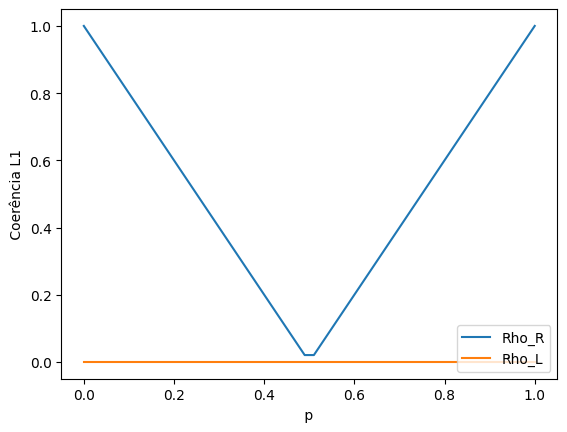

In [3]:
from numpy import linspace
import matplotlib.pyplot as plt
import numpy as np 
import math


def coh_l1(rho):  # normalized to [0,1]
    d = rho.shape[0]
    coh = 0.0
    for j in range(0, d-1):
        for k in range(j+1, d):
            coh += math.sqrt((rho[j][k].real)**2.0 + (rho[j][k].imag)**2.0)
    return 2.0*coh/(d-1)
#from theoric.theoric_tools import *
# theoric plot
#def plot_test(rho):
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR

def pTraceR_num(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

list_gamma = linspace(0,1,10)
list_gamma = [0]
list_p = linspace(0,1,50)

coerencias_R = []
coerencias_L = []
#for g in list_gamma:
for p in list_p:
    rho = bpf_theoric(pi/2, 0, p)
    
    rhoA_R = pTraceR_num(2,2,rho)
    rhoA_L = pTraceL_num(2,2,rho)
    cA_R = coh_l1(rhoA_R)
    cA_L = coh_l1(rhoA_L)
    coerencias_R.append(cA_R)
    coerencias_L.append(cA_L)
plt.plot(list_p,coerencias_R,label='Rho_R')
plt.plot(list_p,coerencias_L,label='Rho_L')
plt.xlabel(' p ')
plt.ylabel(' Coerência L1 ')
plt.legend(loc=4)
plt.show()

In [10]:
def trace(A):
    d = A.shape[0]; tr = 0.0
    for j in range(0,d):
       tr += A[j,j]
    return tr
trace(result).subs(theta,pi).subs(gamma,0.5).subs(p,1)

1.00000000000000

In [ ]:
from sympy.physics.quantum import TensorProduct
from sympy import conjugate

rho_AB = TensorProduct(conjugate(Psi_AB),Psi_AB)
rho_AB

Matrix([
[                                       cos(conjugate(theta)/2)*conjugate(sqrt(p))],
[      exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(gamma*p))],
[                     cos(conjugate(theta)/2)*conjugate(sqrt((1 - gamma)*(1 - p)))],
[                                                                                0],
[exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(p*(1 - gamma)))],
[                                                                                0],
[        exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(1 - p))],
[                  cos(conjugate(theta)/2)*conjugate(gamma)*conjugate(sqrt(1 - p))]])xMatrix([
[                           sqrt(p)*cos(theta/2)],
[      sqrt(gamma*p)*exp(1.0*I*phi)*sin(theta/2)],
[         sqrt((1 - gamma)*(1 - p))*cos(theta/2)],
[                                              0],
[sqrt(p*(1 - gamma))*exp(1.0*I*phi)*sin(theta/2)],
[                                             

In [ ]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
v1 = 2*N.i+3*N.j-N.k
v2 = N.i-4*N.j+N.k
v1.dot(v2)
v3 = v1.cross(v2)
v3

(-1)*N.i + (-3)*N.j + (-11)*N.k

In [ ]:
target_op = state_generalized_amplitude_damping(np.pi/2, 0, p,1)
alpha = eval(input("How many rows? "))
beta = eval(input("How many columns? "))

def make_matrix(alpha,beta):
    matrix_thing = SHIT.random.randint(0,50,(alpha,beta))
    return(matrix_thing)

matrix_sympy = Matrix(make_matrix(alpha, beta))